# FP oil yield model run

### Import the relevant libraries

In [1]:
# we must import the libraries once again since we haven't imported them in this file
import numpy as np
import tensorflow as tf
import statsmodels.api as sm
import seaborn as sns
sns.set()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data

In [2]:
npz = np.load('fp1.npz')

train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.float)

npz = np.load('fp2.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

npz = np.load('fp3.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

### Model
Outline, optimizers, loss, early stopping and training

In [86]:
# Set the input and output sizes
input_size = 3
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(hidden_layer_size,'relu'),
    tf.keras.layers.Dense(hidden_layer_size,'relu'),

    tf.keras.layers.Dense(output_size,'linear') # output layer
])



optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer, loss='MAE')


batch_size = 10

max_epochs = 500


early_stopping = tf.keras.callbacks.EarlyStopping(patience=100)


model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, 
          epochs=max_epochs,
          callbacks=[early_stopping],# batch size
          
          validation_data=(validation_inputs, validation_targets),
           callbacks=[early_stopping],
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 31 samples, validate on 6 samples
Epoch 1/500
31/31 - 1s - loss: 0.3226 - val_loss: 0.4852
Epoch 2/500
31/31 - 0s - loss: 0.2969 - val_loss: 0.1986
Epoch 3/500
31/31 - 0s - loss: 0.1980 - val_loss: 0.2068
Epoch 4/500
31/31 - 0s - loss: 0.2331 - val_loss: 0.1752
Epoch 5/500
31/31 - 0s - loss: 0.1911 - val_loss: 0.1544
Epoch 6/500
31/31 - 0s - loss: 0.1659 - val_loss: 0.1614
Epoch 7/500
31/31 - 0s - loss: 0.1630 - val_loss: 0.1735
Epoch 8/500
31/31 - 0s - loss: 0.1557 - val_loss: 0.1863
Epoch 9/500
31/31 - 0s - loss: 0.1580 - val_loss: 0.2237
Epoch 10/500
31/31 - 0s - loss: 0.1535 - val_loss: 0.1836
Epoch 11/500
31/31 - 0s - loss: 0.1640 - val_loss: 0.1966
Epoch 12/500
31/31 - 0s - loss: 0.1831 - val_loss: 0.1806
Epoch 13/500
31/31 - 0s - loss: 0.1529 - val_loss: 0.2109
Epoch 14/500
31/31 - 0s - loss: 0.1639 - val_loss: 0.1775
Epoch 15/500
31/31 - 0s - loss: 0.1519 - val_loss: 0.2138
Epoch 16/500
31/31 - 0s - loss: 0.1913 - val_loss: 0.2012
Epoch 17/500
31/31 - 0s - loss: 0.1712

Epoch 141/500
31/31 - 0s - loss: 0.0994 - val_loss: 0.1771
Epoch 142/500
31/31 - 0s - loss: 0.0898 - val_loss: 0.1852
Epoch 143/500
31/31 - 0s - loss: 0.0888 - val_loss: 0.1944
Epoch 144/500
31/31 - 0s - loss: 0.0776 - val_loss: 0.1685
Epoch 145/500
31/31 - 0s - loss: 0.1017 - val_loss: 0.1921
Epoch 146/500
31/31 - 0s - loss: 0.0900 - val_loss: 0.2398
Epoch 147/500
31/31 - 0s - loss: 0.1318 - val_loss: 0.2626
Epoch 148/500
31/31 - 0s - loss: 0.1266 - val_loss: 0.2245
Epoch 149/500
31/31 - 0s - loss: 0.1011 - val_loss: 0.2254
Epoch 150/500
31/31 - 0s - loss: 0.1250 - val_loss: 0.2227
Epoch 151/500
31/31 - 0s - loss: 0.1076 - val_loss: 0.2119
Epoch 152/500
31/31 - 0s - loss: 0.1225 - val_loss: 0.2078
Epoch 153/500
31/31 - 0s - loss: 0.1058 - val_loss: 0.2055
Epoch 154/500
31/31 - 0s - loss: 0.0868 - val_loss: 0.2025
Epoch 155/500
31/31 - 0s - loss: 0.0746 - val_loss: 0.2151
Epoch 156/500
31/31 - 0s - loss: 0.0780 - val_loss: 0.2054
Epoch 157/500
31/31 - 0s - loss: 0.0956 - val_loss: 0.20

In [110]:
model.evaluate(test_inputs,test_targets, verbose=2)

8/8 - 0s - loss: 0.0419


0.04188791662454605

# train data evaluation

In [111]:
train_outputs=np.squeeze(model.predict(train_inputs)).round(2)
train_outputs

array([ 0.62, -0.04,  0.57,  0.62,  0.39,  0.78,  0.93,  0.5 ,  0.45,
        0.84,  0.49,  0.53,  0.82,  0.27,  0.51,  0.3 , -0.  ,  0.37,
        0.62,  0.63,  0.49,  0.8 ,  0.81, -0.04,  0.48,  0.78,  0.79,
        0.51,  0.81,  0.56,  0.75,  0.49,  0.96,  0.41,  0.71],
      dtype=float32)

In [112]:
train_targets.round(2)

array([[0.6 ],
       [0.  ],
       [0.57],
       [0.5 ],
       [0.4 ],
       [0.8 ],
       [1.  ],
       [0.5 ],
       [0.42],
       [0.83],
       [0.5 ],
       [0.55],
       [0.81],
       [0.37],
       [0.58],
       [0.38],
       [0.08],
       [0.37],
       [0.63],
       [0.66],
       [0.48],
       [0.78],
       [0.82],
       [0.07],
       [0.47],
       [0.78],
       [0.78],
       [0.5 ],
       [0.47],
       [0.55],
       [0.76],
       [0.49],
       [0.99],
       [0.42],
       [0.72]])

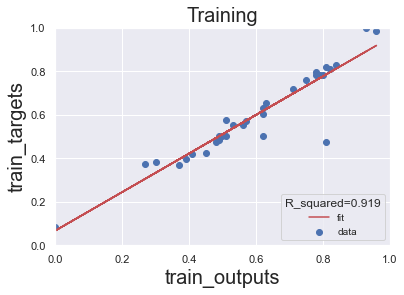

In [113]:
import matplotlib.pyplot as plt
plt.scatter(train_outputs,train_targets,label='data')
x= train_outputs
y=train_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'r',label='fit')
plt.legend(loc='lower right',title='R_squared=0.919',fontsize=10)
plt.title('Training',fontsize=20)
plt.xlabel('train_outputs',fontsize=20)
plt.ylabel('train_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [114]:
b = train_targets
a1 = train_outputs
a = sm.add_constant(a1)
results = sm.OLS(b,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     373.9
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.43e-19
Time:                        17:21:56   Log-Likelihood:                 45.683
No. Observations:                  35   AIC:                            -87.37
Df Residuals:                      33   BIC:                            -84.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.028      2.384      0.023       0.010       0.124
x1             0.8879      0.046     19.337      0.000       0.794       0.981
==============================================================================
Omnibus:                       48.403   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.799
Skew:                          -2.980   Prob(JB):                     5.21e-58
Kurtosis:                      15.057   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test data evaluation

In [115]:
test_outputs=np.squeeze(model.predict(test_inputs)).round(2)
test_outputs

array([ 0.37,  0.53,  0.69,  0.42, -0.  ,  0.61,  0.68,  0.45],
      dtype=float32)

In [116]:
test_targets.round(2)

array([[0.37],
       [0.53],
       [0.75],
       [0.51],
       [0.02],
       [0.58],
       [0.73],
       [0.52]])

## Average error

In [139]:
a=model.evaluate(test_inputs,test_targets)*38.79

f'average error equals {a}', f'error percentage equals {(a/29.863)*100}%'

8/8 [==============================] - 0s 4ms/sample - loss: 0.0419


('average error equals 1.6248322858661413',
 'error percentage equals 5.440954645769485%')

In [135]:
p=[]
for i in range(len(train_targets)):
    a=abs(train_targets[i]-train_outputs[i])*3879/29.863
    p.append(a)
print(max(p),min(p))

[43.53179551] [0.04118871]


In [138]:
p=[]
for i in range(len(test_targets)):
    a=abs(test_targets[i]-test_outputs[i])*3879/29.863
    p.append(a)
print(max(p),min(p))

[11.98205307] [0.22670132]


In [137]:
a=model.evaluate(train_inputs,train_targets)*38.79

f'average error equals {a}', f'error percentage equals {(a/29.863)*100}%'

35/35 [==============================] - 0s 2ms/sample - loss: 0.0375


('average error equals 1.4561218303442',
 'error percentage equals 4.876006530972106%')

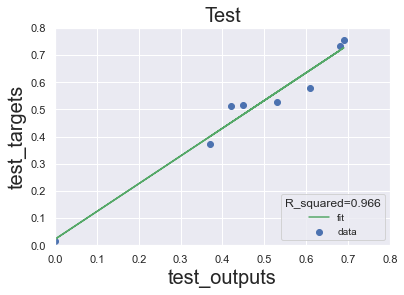

In [120]:
import matplotlib.pyplot as plt
plt.scatter(test_outputs,test_targets,label='data')
x= test_outputs
y=test_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'g',label='fit')
plt.legend(loc='lower right',title='R_squared=0.966',fontsize=10)
plt.title('Test',fontsize=20)
plt.xlabel('test_outputs',fontsize=20)
plt.ylabel('test_targets',fontsize=20)
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.grid(True)

plt.show()

In [121]:
y = test_targets
x1 = test_outputs
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mady\anaconda3\envs\Mywork\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.21e-05
Time:                        17:22:31   Log-Likelihood:                 14.433
No. Observations:                   8   AIC:                            -24.87
Df Residuals:                       6   BIC:                            -24.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.040      0.563      0.594      -0.075       0.120
x1             1.0208      0.078     13.120      0.000       0.830       1.211
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.416
Skew:                          -0.163   Prob(JB):                        0.812
Kurtosis:                       1.932   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### saving the model

In [37]:
model.save('fp_oil_model.h5') 

### retrieving the model

In [3]:
model = tf.keras.models.load_model('fp_oil_model.h5')

In [4]:
import joblib
trans1=joblib.load('f3')
trans2=joblib.load('f4')

### Model deployment

In [5]:
C=float(input('enter your carbon percentage%:>>>'))
H=float(input('enter your hydrogen percentage%:>>>'))
O=float(input('enter your oxygen percentage%:>>>'))
T=float(input('enter your temperature in Kelvin:>>>'))
PS=float(input('enter your particle size:>>>'))



a=np.array([[C,H,O,T,PS],
           ])

x= trans1.transform(a)

y=model(x)
real_y= trans2.inverse_transform(y)

print(f'your oil yield wt% equals{real_y}')


enter your carbon percentage%:>>>44
enter your hydrogen percentage%:>>>5
enter your oxygen percentage%:>>>22
enter your temperature in Kelvin:>>>500
enter your particle size:>>>1
your oil yield wt% equals[[18.61584169]]


### Model optimization

In [125]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import NonlinearConstraint
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

### Differential Evolution optimizer

In [142]:
def objective(x, sign=-1.0):  
    
    z=np.array([x,])
    y=model.predict_on_batch(z)
    return float(np.squeeze(sign*y))


def constraint1(x):
    
    z=np.array([x,])
    b= list(np.squeeze(trans1.inverse_transform(z)))
    C=b[0]
    H=b[1]
    O=b[2]
   
    return (C+H+O)
cons= NonlinearConstraint(constraint1, 12., 100.)



b1 = (0.,1.)
b2 = (0.,1.)
b3 = (0.,1.)
b4 = (0.,1.)
b5 = (0.,1.)


bnds= (b1,b2,b3,b4,b5)
x0=[0.9999,0.1221,0.000047,0.66769,0.7336]


sol = differential_evolution(objective,bounds=bnds,constraints=cons,maxiter=1000)
print(sol)

           constr: [array([0.])]
 constr_violation: 0.0
              fun: -1.1330647468566895
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 3380
              nit: 57
          success: True
                x: array([0.97849844, 0.99886841, 0.00037118, 0.00003835, 0.00036   ])


In [143]:
print(trans1.inverse_transform((sol.x).reshape(1,-1)))
f'the maximum oil yield equals {trans2.inverse_transform(np.array([-sol.fun]).reshape(-1,1))} wt%'

[[ 58.04179829   7.44722762  31.36918311 400.02300753   0.0806912 ]]


'the maximum oil yield equals [[52.53158153]] wt%'

### Dual Annealing optimizer

In [146]:
def objective(x, sign=-1.0):  
    
    z=np.array([x,])
    y=model.predict_on_batch(z)
    return float(np.squeeze(sign*y))



b1 = (0.,1.)
b2 = (0.,1.)
b3 = (0.,1.)
b4 = (0.,1.)
b5 = (0.,1.)



bnds= (b1,b2,b3,b4,b5)
# x0=[0.9999,0.1221,0.000047,0.66769,0.7336]


sol = dual_annealing(objective,bounds=bnds,maxiter=800)

print(sol)

     fun: -1.1349557638168335
 message: ['Maximum number of iteration reached']
    nfev: 8883
    nhev: 0
     nit: 800
    njev: 147
  status: 0
 success: True
       x: array([0.99954901, 1.        , 0.        , 0.00000001, 0.0001306 ])


### Significanc test

In [7]:
list1= ['C','H','O','T','PS']
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(train_inputs.shape[1]):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(train_inputs.shape[1]):
    b[list1[i]]=w[i]
print(b)

{'C': 0.11412, 'H': 0.28556, 'O': 0.08155, 'T': 0.58698, 'PS': 1.07}


In [8]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.053, 0.134, 0.038, 0.275, 0.5]


[Text(0.5, 0, 'variables'), Text(0, 0.5, 'sensitivity')]

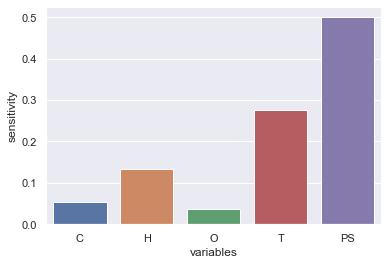

In [9]:
import seaborn as sns
sns.barplot(x=list1,y=t).set(xlabel='variables',ylabel='sensitivity')